In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [17]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
hapus = []

for column in df_train:
    status = df_train[column].isnull().sum() > 90000
    if status:
        hapus.append(column)
        df_train.drop(column, axis=1, inplace=True)
        
for column in df_test:
    if column in hapus:
        df_test.drop(column, axis=1, inplace=True)

df_train.to_csv('Train_clean.csv')
df_test.to_csv('Test_clean.csv')

C:\Users\Dzaky\Anaconda2\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (294,299,300,302,307,313,315,365,367,369) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Dzaky\Anaconda2\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (294,299,300,302,313,315,365,367,369) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
df_train = pd.read_csv('Train_clean.csv')
df_test = pd.read_csv('Test_clean.csv')

df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)

In [172]:
df_test.head()

,UCIC_ID,NO_OF_Accs,HNW_CATEGORY,vintage,OCCUP_ALL_NEW,FINAL_WORTH_prev1,ENGAGEMENT_TAG_prev1,C_prev1,D_prev1,ATM_D_prev1,...,I_CR_AQB_PrevQ2,I_CNR_PrevQ1,I_CNR_PrevQ2,I_NRV_PrevQ1,I_NRV_PrevQ2,CR_AMB_Drop_Build_1,CR_AMB_Drop_Build_2,CR_AMB_Drop_Build_3,CR_AMB_Drop_Build_4,CR_AMB_Drop_Build_5
0,337734,2,2,463,2.0,1.0,3.0,171500.00,332000.00,5000.0,...,3.760351e+05,885.370000,495.876667,4.321568e+05,3.870351e+05,-0.413616,-0.120178,4.013432,-0.752166,-0.274712
1,488166,1,1,3822,5.0,1.0,1.0,15450.00,0.00,0.0,...,4.694943e+05,735.130000,980.710000,3.635899e+05,4.804273e+05,0.048353,-0.061270,-0.263086,0.043885,0.053250
2,410785,1,2,682,3.0,1.0,1.0,0.00,0.00,0.0,...,1.302944e+06,3829.163333,6220.373333,1.302600e+06,1.302944e+06,-0.001660,-0.002298,-0.002335,-0.002246,0.017208
3,389145,1,2,552,3.0,1.0,3.0,1500011.45,1026399.54,5000.0,...,5.198319e+05,1804.773333,1050.553333,8.550804e+05,5.198319e+05,0.239833,0.033097,-0.121292,1.642581,-0.034373
4,221090,1,2,2018,3.0,1.0,2.0,30000.00,100317.90,0.0,...,1.370782e+06,3116.013333,5772.543333,7.917095e+05,1.370782e+06,-0.161961,-0.177401,-0.070550,-0.284596,-0.150070


In [171]:
df_train.head()

,UCIC_ID,NO_OF_Accs,HNW_CATEGORY,vintage,OCCUP_ALL_NEW,FINAL_WORTH_prev1,ENGAGEMENT_TAG_prev1,C_prev1,D_prev1,ATM_D_prev1,...,I_CNR_PrevQ1,I_CNR_PrevQ2,I_NRV_PrevQ1,I_NRV_PrevQ2,CR_AMB_Drop_Build_1,CR_AMB_Drop_Build_2,CR_AMB_Drop_Build_3,CR_AMB_Drop_Build_4,CR_AMB_Drop_Build_5,Responders
0,170114,1,2,1947,1.0,1.0,1.0,0.00,200000.0,0.0,...,1826.046667,2154.266667,9.007502e+05,1.034232e+06,-0.211875,-0.069396,-0.022604,-0.151781,0.454159,0
1,488013,1,1,3082,2.0,1.0,2.0,3198.40,32000.0,18000.0,...,26467.683330,14239.060000,5.272982e+07,5.665658e+07,0.241488,0.167411,-0.071992,-0.013259,-0.302890,0
2,435239,1,2,572,3.0,1.0,1.0,15000.00,1650000.0,0.0,...,315.506667,13.570000,1.801508e+05,2.654720e+04,0.459032,46.068404,0.048818,-0.906061,0.663840,1
3,331646,1,3,773,3.0,1.0,1.0,0.00,0.0,0.0,...,2045.090000,2028.690000,8.561209e+05,8.506973e+05,0.000000,0.000000,0.000000,0.000000,0.019374,0
4,226900,1,2,1627,1.0,1.0,1.0,1057252.95,835000.0,0.0,...,294.580000,74.343333,1.726398e+05,5.572559e+04,8.270783,-0.272225,-0.150621,1.391400,-0.538117,0


In [96]:
# DROP COLUMN 1
df_test.drop(['city'], axis=1, inplace=True)
df_train.drop(['city'], axis=1, inplace=True)

# DROP COLUMN 2
df_test.drop(['dependents'], axis=1, inplace=True)
df_train.drop(['dependents'], axis=1, inplace=True)

# DROP COLUMN 3
df_test.drop(['Charges_cnt_PrevQ1_N'], axis=1, inplace=True)
df_train.drop(['Charges_cnt_PrevQ1_N'], axis=1, inplace=True)

# DROP COLUMN 4
df_test.drop(['FRX_PrevQ1_N'], axis=1, inplace=True)
df_train.drop(['FRX_PrevQ1_N'], axis=1, inplace=True)

# DROP COLUMN 5
df_test.drop(['city'], axis=1, inplace=True)
df_train.drop(['city'], axis=1, inplace=True)

# DROP COLUMN 6
df_test.drop(['ATM_C_prev1'], axis=1, inplace=True)
df_train.drop(['ATM_C_prev1'], axis=1, inplace=True)

# DROP COLUMN 7
df_test.drop(['ATM_D_prev1'], axis=1, inplace=True)
df_train.drop(['ATM_D_prev1'], axis=1, inplace=True)

In [97]:
# REPLACE VALUE 1
df_train['OCCUP_ALL_NEW'] = df_train['OCCUP_ALL_NEW'].map({'HOUSEWIFE': 1, 'SALARIED': 2, 'SELF_EMPLOYED': 3, 'INDIVIDUAL': 4, 'RETIRED': 5, 'STUDENT': 6, 'NON_INDIVIDUA': 7, 'MISSING': 0})
df_test['OCCUP_ALL_NEW'] = df_test['OCCUP_ALL_NEW'].map({'HOUSEWIFE': 1, 'SALARIED': 2, 'SELF_EMPLOYED': 3, 'INDIVIDUAL': 4, 'RETIRED': 5, 'STUDENT': 6, 'NON_INDIVIDUA': 7, 'MISSING': 0})

df_train['OCCUP_ALL_NEW'].fillna(0, inplace=True)
df_test['OCCUP_ALL_NEW'].fillna(0, inplace=True)

# REPLACE VALUE 2
df_train['HNW_CATEGORY'] = df_train['HNW_CATEGORY'].map({'1_Imperia': 1, '2_Preferred': 2, '3_Classic': 3})
df_test['HNW_CATEGORY'] = df_test['HNW_CATEGORY'].map({'1_Imperia': 1, '2_Preferred': 2, '3_Classic': 3})

# REPLACE VALUE 3
df_train['FINAL_WORTH_prev1'] = df_train['FINAL_WORTH_prev1'].map({'HIGH': 1, 'MEDIUM': 2, 'LOW': 3})
df_test['FINAL_WORTH_prev1'] = df_test['FINAL_WORTH_prev1'].map({'HIGH': 1, 'MEDIUM': 2, 'LOW': 3})

df_train['FINAL_WORTH_prev1'].fillna(1, inplace=True)
df_test['FINAL_WORTH_prev1'].fillna(1, inplace=True)

# REPLACE VALUE 4
df_train['ENGAGEMENT_TAG_prev1'] = df_train['ENGAGEMENT_TAG_prev1'].map({'HIGH': 3, 'MEDIUM': 2, 'LOW': 1, 'NO': 0})
df_test['ENGAGEMENT_TAG_prev1'] = df_test['ENGAGEMENT_TAG_prev1'].map({'HIGH': 3, 'MEDIUM': 2, 'LOW': 1, 'NO': 0})

df_train['ENGAGEMENT_TAG_prev1'].fillna(1, inplace=True)
df_test['ENGAGEMENT_TAG_prev1'].fillna(1, inplace=True)

# REPLACE VALUE 5
df_train['RBI_Class_Audit'] = df_train['RBI_Class_Audit'].map({'SEMI-URBAN': 1, 'METROPOLITAN': 2, 'URBAN': 3, 'RURAL': 4})
df_test['RBI_Class_Audit'] = df_test['RBI_Class_Audit'].map({'SEMI-URBAN': 1, 'METROPOLITAN': 2, 'URBAN': 3, 'RURAL': 4})

# REPLACE VALUE 4
df_train['gender_bin'] = df_train['gender_bin'].map({'Male': 1, 'Female': 2, 'Missin': 0})
df_test['gender_bin'] = df_test['gender_bin'].map({'Male': 1, 'Female': 2, 'Missin': 0})

In [187]:
df_train.iloc[:, 70:80]

,MB_D_prev3,POS_C_prev3,POS_D_prev3,count_C_prev3,count_D_prev3,COUNT_ATM_C_prev3,COUNT_ATM_D_prev3,COUNT_BRANCH_C_prev3,COUNT_BRANCH_D_prev3,COUNT_IB_C_prev3
0,0,0,0.00,0,5,0,5,0,0,0
1,0,0,0.00,0,12,0,5,0,5,0
2,0,0,0.00,0,0,0,0,0,0,0
3,0,0,0.00,0,0,0,0,0,0,0
4,0,0,0.00,1,4,0,0,1,2,0
5,0,0,0.00,0,0,0,0,0,0,0
6,0,0,0.00,0,1,0,0,0,0,0
7,0,0,1673.73,0,2,0,0,0,0,0
8,0,0,0.00,0,1,0,0,0,1,0
9,0,0,0.00,1,0,0,0,1,0,0


In [177]:
df_test.drop(['ATM_D_prev1'], axis=1, inplace=True)
df_train.drop(['ATM_D_prev1'], axis=1, inplace=True)

In [153]:
df_test['gender_bin'].isnull().values.sum()

0

In [154]:
df_train['gender_bin'].isnull().values.sum()

0

KeyboardInterrupt: 

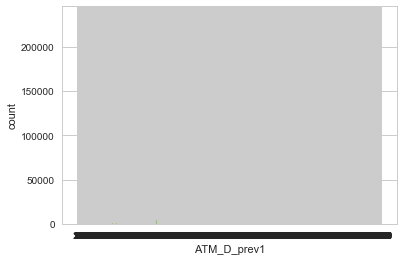

In [174]:
sns.countplot(x='ATM_D_prev1', data=df_train, palette='hls')
plt.show

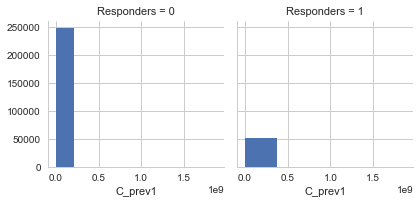

In [180]:
g = sns.FacetGrid(df_train, col='Responders')
g.map(plt.hist, 'C_prev1', bins=5)

In [188]:
X_train = df_train.iloc[:,1:80]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,1:80]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#classifier = LogisticRegression(random_state=0)
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
np.savetxt("hasil.csv", y_pred, delimiter=",", fmt="%i")
#print("\n")
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
#print("\n")
#print(classification_report(y_test, y_pred))